Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [2]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#### Load the movies dataset 
automobile_df = pd.read_csv('automobile.txt',delimiter = ',', skipinitialspace=True)

### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise.

In [4]:
columns_to_remove = ['symboling', 'normalized-losses', 'engine-location', 'bore', 'stroke', 'compression-ratio', 'peak-rpm']

automobile_df = automobile_df.drop(columns=columns_to_remove)

#### Remove any duplicate rows

In [5]:
automobile_df = automobile_df.drop_duplicates()

#### Remove rows with missing data 

In [6]:
automobile_df = automobile_df.replace('?', np.nan)
automobile_df = automobile_df.replace('l', np.nan)
automobile_df = automobile_df.dropna()

Change price column to a integer data type using numpyâ€™s `int64` method.

In [7]:
automobile_df['price'] = automobile_df['price'].astype(np.int64)

### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive automobiles? 

How do the most expensive and cheapest automobiles compare? Exploring the most expensive automobiles highlights if their higher price is justified based on their horsepower and fuel efficiency (city/highway MPG).

In [8]:
# Code here
most_expensive_automobiles = automobile_df.sort_values(by='price', ascending=False)
most_expensive_automobiles.head()


make fuel-type aspiration num-of-doors   body-style  \
74   mercedes-benz       gas        std          two      hardtop   
16             bmw       gas        std          two        sedan   
73   mercedes-benz       gas        std         four        sedan   
128        porsche       gas        std          two  convertible   
17             bmw       gas        std         four        sedan   

    drive-wheels  wheel-base  length  width  height  curb-weight engine-type  \
74           rwd       112.0   199.2   72.0    55.4         3715        ohcv   
16           rwd       103.5   193.8   67.9    53.7         3380         ohc   
73           rwd       120.9   208.1   71.7    56.7         3900        ohcv   
128          rwd        89.5   168.9   65.0    51.6         2800        ohcf   
17           rwd       110.0   197.0   70.9    56.3         3505         ohc   

    num-of-cylinders  engine-size fuel-system horsepower  city-mpg  \
74             eight          304        mpfi        184        14   
16               six          209        mpfi        182        16   
73             eight          308        mpfi        184        14   
128              six          194        mpfi        207        17   
17               six          209        mpfi        182        15   

     highway-mpg  price  
74            16  45400  
16            22  41315  
73            16  40960  
128           25  37028  
17            20  36880

In [9]:
cheapest_automobiles = automobile_df.sort_values(by='price', ascending=True)
cheapest_automobiles.head()

make fuel-type aspiration num-of-doors body-style drive-wheels  \
138      subaru       gas        std          two  hatchback          fwd   
50        mazda       gas        std          two  hatchback          fwd   
150      toyota       gas        std          two  hatchback          fwd   
76   mitsubishi       gas        std          two  hatchback          fwd   
32        honda       gas        std          two  hatchback          fwd   

     wheel-base  length  width  height  curb-weight engine-type  \
138        93.7   156.9   63.4    53.7         2050        ohcf   
50         93.1   159.1   64.2    54.1         1890         ohc   
150        95.7   158.7   63.6    54.5         1985         ohc   
76         93.7   157.3   64.4    50.8         1918         ohc   
32         93.7   150.0   64.0    52.6         1837         ohc   

    num-of-cylinders  engine-size fuel-system horsepower  city-mpg  \
138             four           97        2bbl         69        31   
50              four           91        2bbl         68        30   
150             four           92        2bbl         62        35   
76              four           92        2bbl         68        37   
32              four           79        1bbl         60        38   

     highway-mpg  price  
138           36   5118  
50            31   5195  
150           39   5348  
76            41   5389  
32            42   5399

We can see that the most expensive cars have very high horsepower while the cheaper cars have very low horsepower. Although this is true, cheaper cars tend to have better fuel efficiency, because of their higher MPG while expensive cars have very low MGP.

Text(0, 0.5, 'Price')

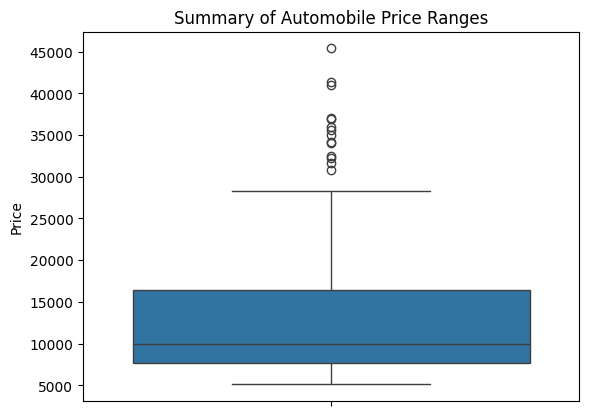

In [16]:
sns.boxplot(y='price', data=automobile_df)
plt.title('Summary of Automobile Price Ranges')
plt.ylabel('Price')

The majority of cars in the dataset fall within the price ranges of roughly 7,000 to 16,500, with the median price around 10,000, but there are numerous more expensive outliers, reaching up to around 45,000.

#### Find the most popular automobiles. 
Create a bar plot displaying the frequency of automobile makes.

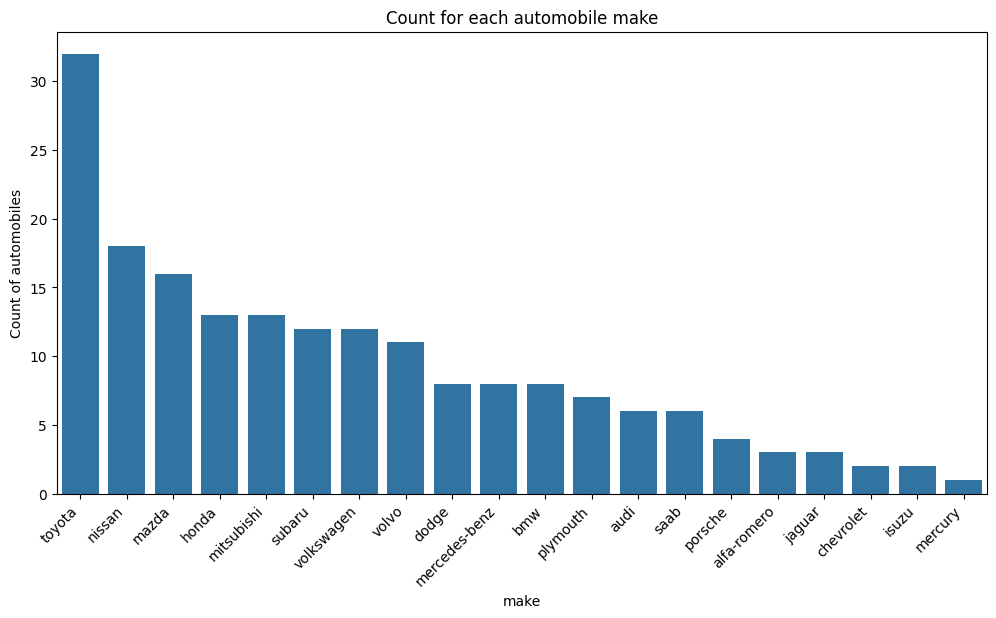

In [11]:
make_order = automobile_df['make'].value_counts().index

plt.figure(figsize=(12, 6))
sns.countplot(x='make', data=automobile_df, order=make_order)
plt.title('Count for each automobile make')
plt.xlabel('make')
plt.ylabel('Count of automobiles')
plt.xticks(rotation=45, ha='right');

We can see that Toyota is the automobile company with the most makes with over 30 of them. 

Text(0, 0.5, 'Highway MPG')

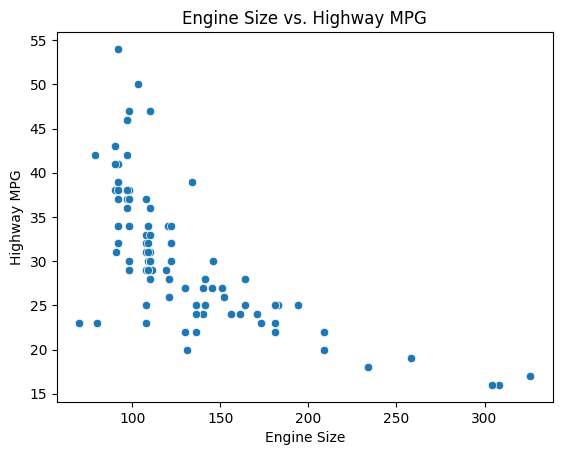

In [12]:
sns.scatterplot(x='engine-size', y='highway-mpg', data=automobile_df)
plt.title('Engine Size vs. Highway MPG')
plt.xlabel('Engine Size')
plt.ylabel('Highway MPG')

The Engine Size and Highway MPG chart typically shows a negative relationship, suggesting that larger engines tend to be associated with lower highway fuel efficiency.

body-style
sedan          85
hatchback      66
wagon          20
hardtop         8
convertible     6
Name: count, dtype: int64

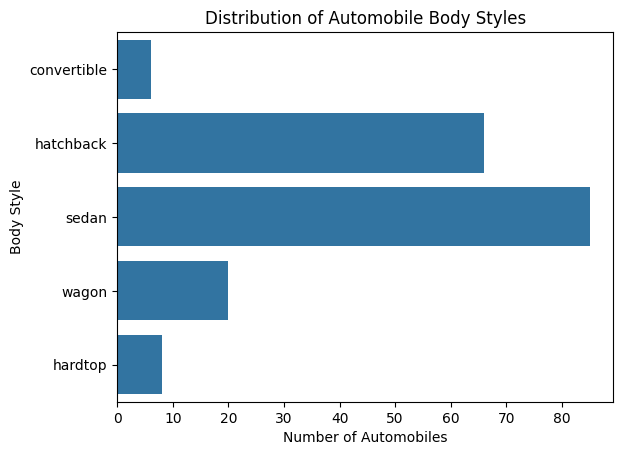

In [13]:
sns.countplot(y='body-style', data=automobile_df)
plt.title('Distribution of Automobile Body Styles')
plt.xlabel('Number of Automobiles')
plt.ylabel('Body Style')

body_style_counts = automobile_df['body-style'].value_counts()
body_style_counts

The hatchback and sedan auto body styles are widely the most common styles with being over 80 percent of all vehicles

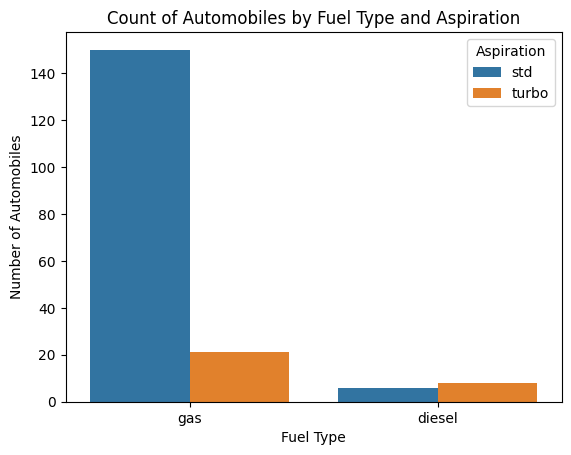

In [14]:
sns.countplot(x='fuel-type', hue='aspiration', data=automobile_df)
plt.title('Count of Automobiles by Fuel Type and Aspiration')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Automobiles')
plt.legend(title='Aspiration')

The most common fuel type of automobiles is gas with a std aspiration.